In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
# Import tensorflow modules
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Drop unnamed columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Labelling coumns
df.columns = ['labels', 'data']

In [9]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Create binary labels (0 and 1)
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
y = df['b_labels'].values

In [11]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
# Split test train data
x_train, x_test, y_train, y_test = train_test_split(df['data'], y, test_size=0.33)

In [15]:
# Convert sentences to sequences
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [16]:
# Check word index mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Total number of unique tokens are: %s' % V)

Total number of unique tokens are: 7227


In [17]:
# Pad sequences (to get  N x T matrix)
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

Shape of data train tensor: (3733, 189)


In [18]:
# Set the value of T to get sequence length
T = data_train.shape[1]
T

189

In [19]:
# Pad test set
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


### Building the Model 

In [20]:
# Embedding dimensionality
D = 20
# Hidden state vectorsize (dimensionality)
M = 15

# Input layer
i = Input(shape=(T,))

# Embedding layer
x = Embedding(V + 1, D)(i)

# LSTM layer
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Train the model
r = model.fit(x=data_train, y=y_train, epochs=10, validation_data=(data_test, y_test))

Epoch 1/10
117/117 [==============================] - 15s 130ms/step - loss: 0.4703 - accuracy: 0.8693 - val_loss: 0.4073 - val_accuracy: 0.8586
Epoch 2/10
117/117 [==============================] - 14s 123ms/step - loss: 0.3865 - accuracy: 0.8695 - val_loss: 0.4048 - val_accuracy: 0.8586
Epoch 3/10
117/117 [==============================] - 15s 130ms/step - loss: 0.3806 - accuracy: 0.8695 - val_loss: 0.3941 - val_accuracy: 0.8586
Epoch 4/10
117/117 [==============================] - 14s 122ms/step - loss: 0.3581 - accuracy: 0.8695 - val_loss: 0.3520 - val_accuracy: 0.8586
Epoch 5/10
117/117 [==============================] - 14s 119ms/step - loss: 0.2279 - accuracy: 0.9113 - val_loss: 0.1299 - val_accuracy: 0.9782
Epoch 6/10
117/117 [==============================] - 15s 125ms/step - loss: 0.0646 - accuracy: 0.9920 - val_loss: 0.0665 - val_accuracy: 0.9853
Epoch 7/10
117/117 [==============================] - 15s 127ms/step - loss: 0.0312 - accuracy: 0.9957 - val_loss: 0.0533 - val_ac

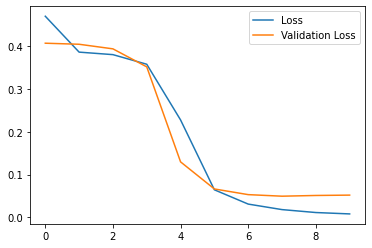

In [23]:
# Loss per iteration
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

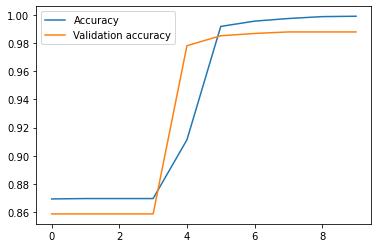

In [24]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()